In [5]:
import pandas as pd
import numpy as np
%pylab inline

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


# Reading the data (may vary depending on the table used)

In [6]:
FAEM = pd.read_excel('231009-MINT__EccFAEM__results_peak_max.xlsx')

In [7]:
FAEM.head()

,ms_file_label,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine X,Adenosine monophosphate,Alanine X,Alpha Ketoglutarate,Arabitol,Arginine,...,Trehalose,Tryptophan,Tyrosine,Uracil XF,Urate,Uridine,Urocanate,Valine,Xanthine,Xanthosine
0,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06533_...,13475,19796,8777,11631,0,13675,0,7742,54674,...,0,0,0,18838,0,0,10550,36487,0,0
1,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06534_...,14506,21915,10254,10086,0,12040,0,6231,21415,...,0,0,0,17209,0,0,12271,45709,0,0
2,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06535_...,12217,24145,8894,9262,0,13459,0,7832,11936,...,0,0,0,15907,0,0,13609,41073,0,0
3,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06536_...,32410,190362,53919,111563,0,10066,16512,48588,16426,...,0,0,0,24522,11573,13713,42476,33553,51238,17727
4,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06537_...,92321,788241,143484,422614,0,11874,87470,199905,25852,...,0,23040,8742,74303,38102,45692,90658,41733,158450,68555


# data transformed to an specific format

In [8]:
faem = FAEM.melt(id_vars=["ms_file_label"],  var_name="peak_label",  value_name="peak_max")
faem.head()

,ms_file_label,peak_label,peak_max
0,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06533_...,Acetoacetate,13475
1,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06534_...,Acetoacetate,14506
2,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06535_...,Acetoacetate,12217
3,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06536_...,Acetoacetate,32410
4,FAEM001_G4_T0_230309_HILICNeg4S_Col03_RN06537_...,Acetoacetate,92321


# information from the file_name about batch, sample type, organism

In [9]:
def sample_type(string):
    if ('Std' in string) or ('STD' in string) or ('std' in string):
        return 'Std'
    if ('Blank' in string) or ('blank' in string):
        return 'Blank'
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    if ('FAEMPool' in string) or ('FAEMPool' in string) or ('FAEMPool' in string):
        return 'FAEMPool'
    if ('FAESPool' in string) or ('FAESPool' in string) or ('FAESPool' in string):
        return 'FAESPool'
    
    if 'ATCC' in string:
        return 'ATCC'
    if 'BI_' in string: 
        return 'Bi'
    if 'CI_' in string:  # companion isolates
        return 'Ci'
    
    return 'Unk'

def get_organim(string):
    if ('BI_' in string) or ('CI_' in string):
        return string[:4]
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    return 'Unk'

In [11]:
faem['Date'] = faem.ms_file_label.apply(lambda x: re.findall(r'_(\d{6})', x)[0])
faem['Col'] = faem.ms_file_label.apply(lambda x: 'Col'+ re.findall(r'Col(\d{2})', x)[0])
faem['SType'] = faem.ms_file_label.apply(lambda x: sample_type(x))
faem['Batch'] = faem.ms_file_label.apply(lambda x: x[:7])
faem['Organism'] = faem.ms_file_label.apply(lambda x: get_organim(x))

In [12]:
cc_value = faem.copy()

# generating graphs

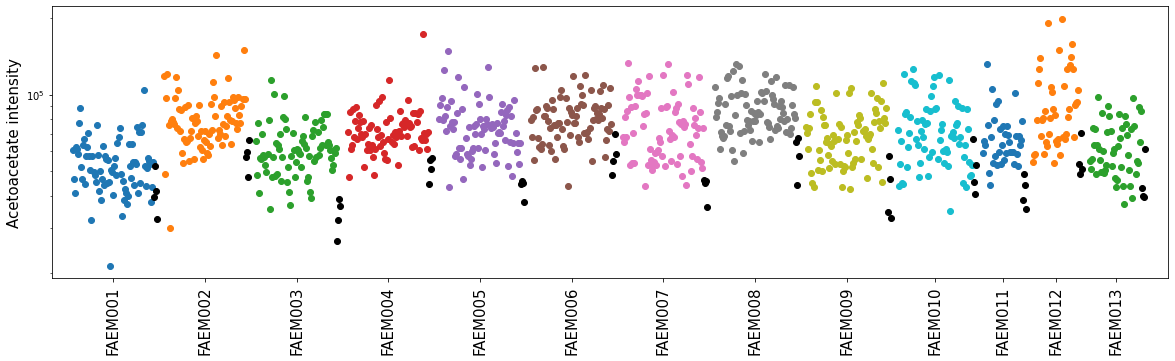

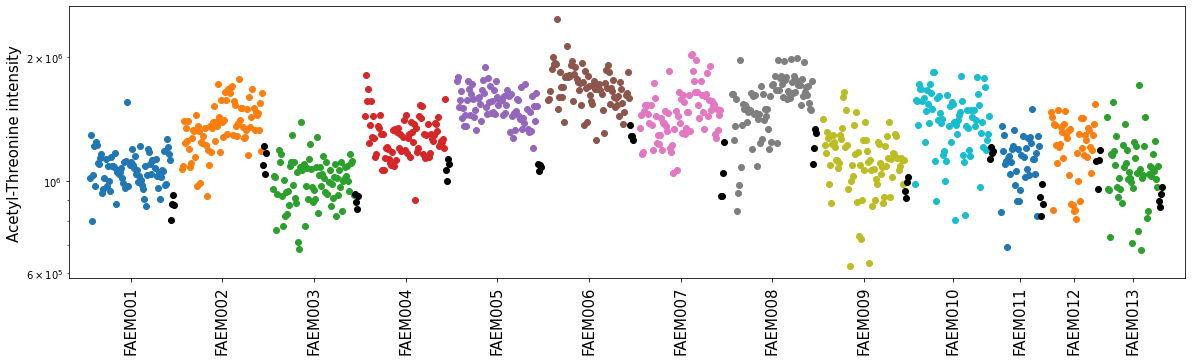

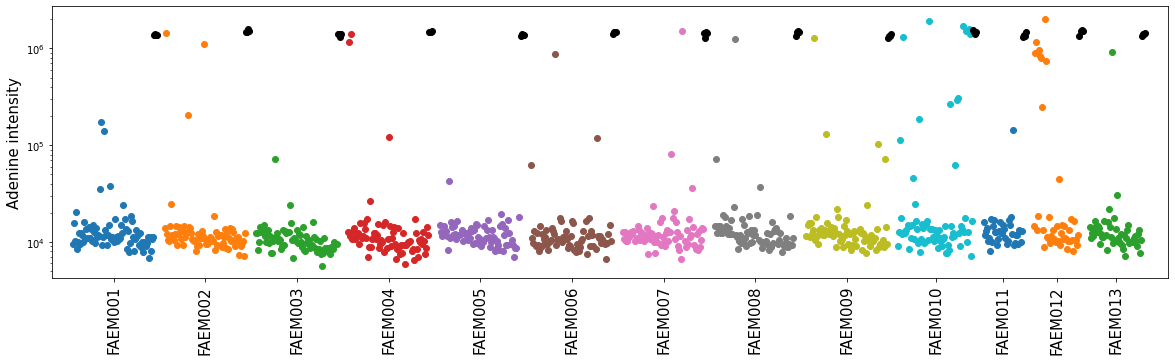

In [23]:
step1 = 10
for cp in np.unique(cc_value.peak_label)[:3]:
    fig = plt.figure(figsize=(20,5))
    plt.ylabel(cp + ' intensity', fontsize = 15)
    k = 0
    x_pos = []
    for batch in np.unique(cc_value.Batch):
        y = cc_value.peak_max[(cc_value.peak_label == cp) & (cc_value.Batch == batch) & (cc_value.SType == 'Bi' )]
        x = range(k, k+ len(y))
        

        
        plt.plot(x, y, 'o')
        x_pos.append( k + len(y)/2 )
       
        k += len(y)
        
        ymh = cc_value.peak_max[(cc_value.peak_label == cp) & (cc_value.Batch == batch) & (cc_value.SType == 'MHPool' )]
        xmh = range(k, k+ len(ymh))
        plt.plot(xmh, ymh, 'o', color = 'black')
        k += step1
    plt.xlim(-20, k+ 15)
    plt.yscale('log')
    plt.xticks(x_pos, np.unique(cc_value.Batch), rotation = 90, fontsize = 15)
    plt.show()